<a href="https://colab.research.google.com/github/Iman-Kalyan-Majumder/Diabetes-Prediction/blob/main/Neural_Networks_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv("diabetes(1).csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


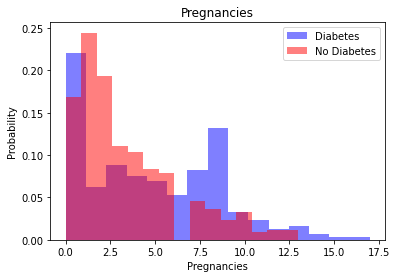

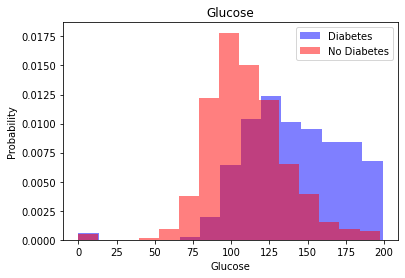

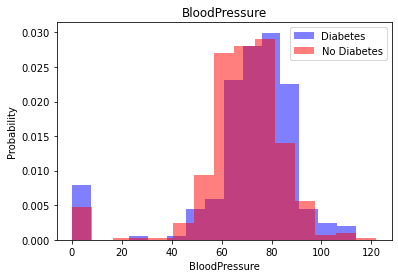

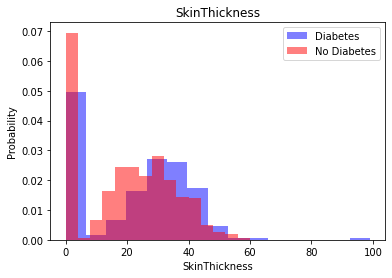

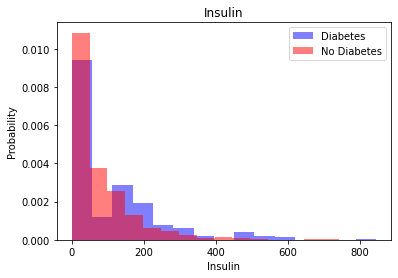

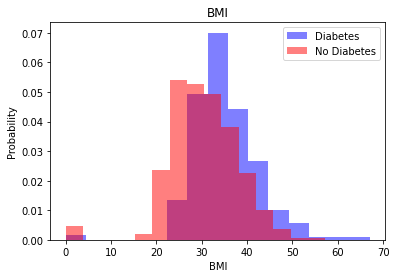

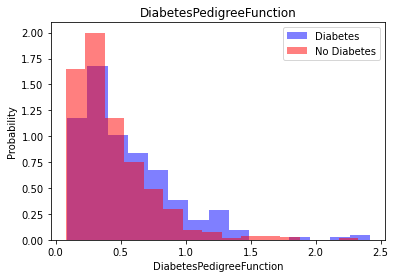

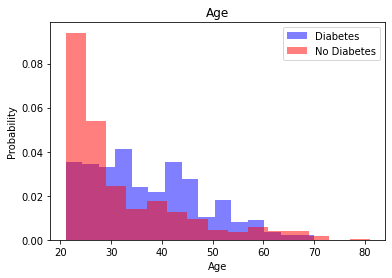

In [4]:
for i in range(len(df.columns[:-1])):
  label=df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color='blue', label='Diabetes', alpha=0.5, density=True, bins=15)
  plt.hist(df[df['Outcome']==0][label], color='red', label='No Diabetes', alpha=0.5, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [5]:
len(df[df['Outcome']==1]),len(df[df['Outcome']==0])

(268, 500)

In [6]:
scaler = StandardScaler()
X = df[df.columns[:-1]].values
X = scaler.fit_transform(X)
y=df[df.columns[-1]].values
over = RandomOverSampler()
X , y = over.fit_resample(X,y)
data = np.hstack((X, np.reshape(y,(-1,1))))
df_transformed = pd.DataFrame(data, columns=df.columns)

len(df_transformed[df_transformed['Outcome']==1]), len(df_transformed[df_transformed['Outcome']==1])

(500, 500)

In [108]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.3,random_state=0)

In [109]:
X_valid, X_test, y_valid, y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=0)

In [99]:
model=tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [113]:
model.compile(
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0015),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['Accuracy']
)

In [110]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    patience=100,
    min_delta=0.001,
    restore_best_weights=True
)

In [24]:
model.evaluate(X_train,y_train)

22/22 [==============================] - 0s 2ms/step - loss: 0.7052 - Accuracy: 0.4743


[0.7051635980606079, 0.47428572177886963]

In [25]:
model.evaluate(X_valid,y_valid)

5/5 [==============================] - 0s 4ms/step - loss: 0.7104 - Accuracy: 0.4733


[0.7104178071022034, 0.47333332896232605]

In [124]:
history = model.fit(
    X_train,
    y_train,
    batch_size=15,
    epochs=200,
    validation_data=(X_valid,y_valid),
    callbacks=[early_stopping]
)

Epoch 1/200
47/47 [==============================] - 0s 9ms/step - loss: 0.4474 - Accuracy: 0.7943 - val_loss: 0.4502 - val_Accuracy: 0.8200
Epoch 2/200
47/47 [==============================] - 0s 5ms/step - loss: 0.4463 - Accuracy: 0.7886 - val_loss: 0.4513 - val_Accuracy: 0.8267
Epoch 3/200
47/47 [==============================] - 0s 5ms/step - loss: 0.4448 - Accuracy: 0.7900 - val_loss: 0.4544 - val_Accuracy: 0.8400
Epoch 4/200
47/47 [==============================] - 0s 6ms/step - loss: 0.4335 - Accuracy: 0.7929 - val_loss: 0.4516 - val_Accuracy: 0.8467
Epoch 5/200
47/47 [==============================] - 0s 6ms/step - loss: 0.4315 - Accuracy: 0.8157 - val_loss: 0.4517 - val_Accuracy: 0.8467
Epoch 6/200
47/47 [==============================] - 0s 7ms/step - loss: 0.4549 - Accuracy: 0.7714 - val_loss: 0.4625 - val_Accuracy: 0.8467
Epoch 7/200
47/47 [==============================] - 0s 6ms/step - loss: 0.4690 - Accuracy: 0.7643 - val_loss: 0.4549 - val_Accuracy: 0.8467
Epoch 8/200
4

In [125]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.4340 - Accuracy: 0.8067


[0.4340164065361023, 0.8066666722297668]

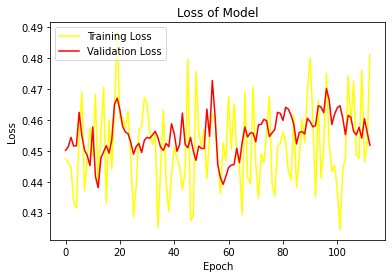

In [127]:
plt.plot(history.history['loss'], label='Training Loss', color='yellow')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Loss of Model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()